In [108]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt

In [109]:
df = pd.read_csv(r'C:\Users\sarka\Desktop\Major Project\input\volatility.csv' , header=0)
df.keys()

Index(['Code', 'Volt', 'Growth'], dtype='object')

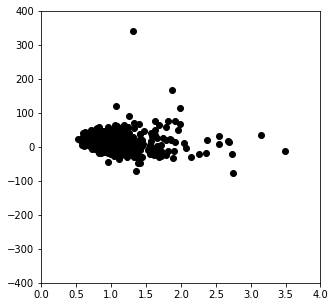

In [110]:
sc = MinMaxScaler(feature_range=(0,1))
df = df.drop(columns=['Code'])
#X = df['Volt'].values
#Y = df['Growth'].values
#print(X)
#X.reshape(1,-1)
#df = sc.fit_transform(df)
#Y.reshape(-1,1)
#Y = sc.fit_transform(Y)
np.random.seed(200)
k = 3
# centroids[i] = [x, y]
centroids = {
    i+1: [np.random.randint(0, 80), np.random.randint(0, 80)]
    for i in range(k)
}  
fig = plt.figure(figsize=(5, 5))
plt.scatter(df['Volt'] , df['Growth'], color='k')
colmap = {1: 'r', 2: 'g', 3: 'b'}
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(0, 4)
plt.ylim(-400, 400)
plt.show()

   Volt  Growth  distance_from_1  distance_from_2  distance_from_3  closest  \
0  0.97   35.03        31.442675        67.391407        67.806945        1   
1  1.44   19.11        24.756124        70.385977        78.135432        1   
2  1.03  -11.94        37.471916        85.991305       103.180446        1   
3  0.86    5.69        27.171965        76.329521        88.739144        1   
4  1.19   13.59        24.926777        72.599616        82.404637        1   

  color  
0     r  
1     r  
2     r  
3     r  
4     r  


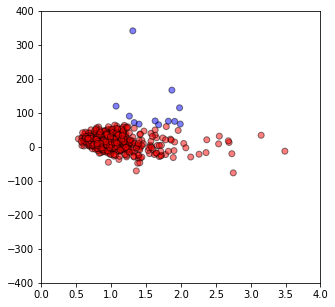

In [111]:
def assignment(df, centroids):
    for i in centroids.keys():
        # sqrt((x1 - x2)^2 - (y1 - y2)^2)
        df['distance_from_{}'.format(i)] = (
            np.sqrt(
                (df['Volt'] - centroids[i][0]) ** 2
                + (df['Growth'] - centroids[i][1]) ** 2
            )
        )
    centroid_distance_cols = ['distance_from_{}'.format(i) for i in centroids.keys()]
    df['closest'] = df.loc[:, centroid_distance_cols].idxmin(axis=1)
    df['closest'] = df['closest'].map(lambda x: int(x.lstrip('distance_from_')))
    df['color'] = df['closest'].map(lambda x: colmap[x])
    return df

df = assignment(df, centroids)
print(df.head())

fig = plt.figure(figsize=(5, 5))
plt.scatter(df['Volt'], df['Growth'], color=df['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(0, 4)
plt.ylim(-400, 400)
plt.show()

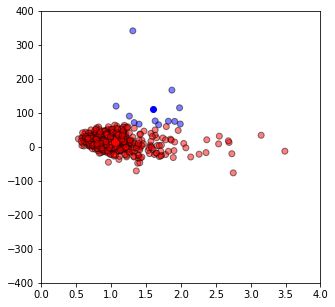

In [112]:
import copy

old_centroids = copy.deepcopy(centroids)

def update(k):
    for i in centroids.keys():
        centroids[i][0] = np.mean(df[df['closest'] == i]['Volt'])
        centroids[i][1] = np.mean(df[df['closest'] == i]['Growth'])
    return k

centroids = update(centroids)
    
fig = plt.figure(figsize=(5, 5))
ax = plt.axes()
plt.scatter(df['Volt'], df['Growth'], color=df['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(0, 4)
plt.ylim(-400, 400)
for i in old_centroids.keys():
    old_x = old_centroids[i][0]
    old_y = old_centroids[i][1]
    dx = (centroids[i][0] - old_centroids[i][0]) * 0.75
    dy = (centroids[i][1] - old_centroids[i][1]) * 0.75
    ax.arrow(old_x, old_y, dx, dy, head_width=2, head_length=3, fc=colmap[i], ec=colmap[i])
plt.show()

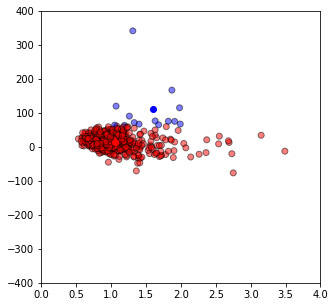

In [113]:
df = assignment(df, centroids)

# Plot results
fig = plt.figure(figsize=(5, 5))
plt.scatter(df['Volt'], df['Growth'], color=df['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(0, 4)
plt.ylim(-400, 400)
plt.show()

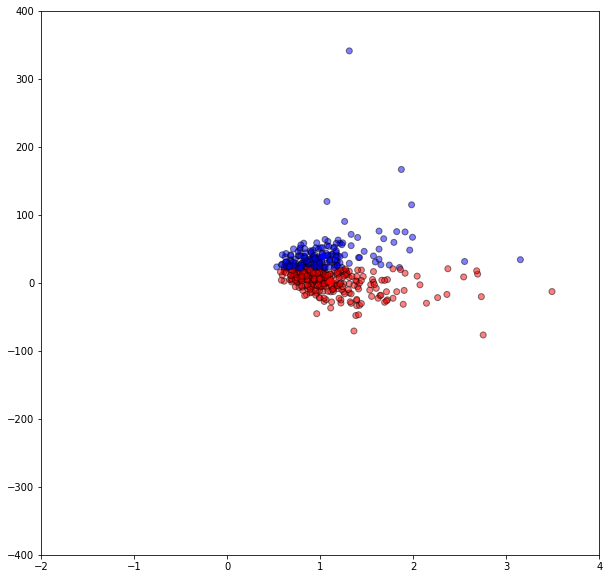

In [114]:
while True:
    closest_centroids = df['closest'].copy(deep=True)
    centroids = update(centroids)
    df = assignment(df, centroids)
    if closest_centroids.equals(df['closest']):
        break

fig = plt.figure(figsize=(10, 10))
plt.scatter(df['Volt'], df['Growth'], color=df['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(-2, 4)
plt.ylim(-400, 400)
plt.xscale('linear')
plt.show()